Type 1 for Great Smokey Mountains, 2 for Yellowstone, 3 for Yosemite3
SciName: Abies concolor Count: 1260
SciName: Abies magnifica Count: 1497
SciName: Abies magnifica magnifica Count: 1
SciName: Abies magnifica shastensis Count: 1
SciName: Ablabesmyia Count: 6
SciName: Acari Count: 44
undefined
SciName: Accipiter cooperii Count: 209
SciName: Accipiter gentilis Count: 171
SciName: Accipiter striatus Count: 143
SciName: Acentrella Count: 3
SciName: Acentrella turbida Count: 4
SciName: Acer glabrum Count: 2
SciName: Acer glabrum torreyi Count: 1
SciName: Acer macrophyllum Count: 17
SciName: Achillea millefolium Count: 61
SciName: Achillea millefolium millefolium Count: 1
SciName: Achnanthes subhudsonis kraeuselii Count: 3
SciName: Achnanthidium affine Count: 19
undefined
SciName: Achnanthidium exiguum Count: 1
SciName: Achnanthidium minutissimum Count: 51
undefined
undefined
SciName: Achnatherum hymenoides Count: 8
SciName: Achnatherum latiglume Count: 5
SciName: Achnatherum lemmonii Cou

SciName: Bromus suksdorfii Count: 9
SciName: Bromus tectorum Count: 48
SciName: Bromus vulgaris Count: 1
SciName: Brundiniella eumorpha Count: 3
undefined
SciName: Bubo virginianus Count: 308
SciName: Bucephala albeola Count: 24
SciName: Bucephala clangula Count: 5
SciName: Bufo boreas Count: 1
SciName: Bufo canorus Count: 1
SciName: Bulbostylis capillaris Count: 1
SciName: Buteo jamaicensis Count: 1238
SciName: Buteo lagopus Count: 2
SciName: Buteo lineatus Count: 272
SciName: Buteo regalis Count: 2
SciName: Buteo swainsoni Count: 14
SciName: Butorides striatus Count: 1
SciName: Butorides virescens Count: 2
SciName: Calamagrostis breweri Count: 44
SciName: Calamagrostis canadensis Count: 20
SciName: Calamagrostis purpurascens Count: 9
SciName: Calamagrostis stricta Count: 1
SciName: Calamagrostis stricta inexpansa Count: 1
SciName: Calamospiza melanocorys Count: 1
SciName: Calamovilfa brevipilis Count: 1
SciName: Calandrinia ciliata Count: 3
SciName: Calcarius mccownii Count: 1
SciNam

SciName: Cerastium glomeratum Count: 9
SciName: Ceratopogonidae Count: 1
SciName: Ceratopogoninae Count: 5
SciName: Ceratopsyche Count: 35
SciName: Ceratopsyche cockerelli Count: 9
SciName: Ceratopsyche oslari Count: 5
SciName: Cercis canadensis Count: 20
SciName: Cercis occidentalis Count: 3
SciName: Cercocarpus betuloides Count: 1
SciName: Cercocarpus betuloides betuloides Count: 1
SciName: Cercocarpus ledifolius Count: 7
SciName: Cercocarpus montanus Count: 16
SciName: Cercyonis sthenele Count: 2
SciName: Ceriodaphnia Count: 1
undefined
SciName: Certhia americana Count: 3596
SciName: Ceryle alcyon Count: 8
undefined
SciName: Chaenactis alpigena Count: 1
SciName: Chaenactis douglasii Count: 7
SciName: Chaenactis douglasii douglasii Count: 1
SciName: Chaenactis glabriuscula heterocarpha Count: 1
SciName: Chaenactis glabriuscula megacephala Count: 1
SciName: Chaetodipus californicus Count: 1
SciName: Chaetophora Count: 1
SciName: Chaetura vauxi Count: 170
SciName: Chamaea fasciata Coun

SciName: Delphinium depauperatum Count: 2
SciName: Delphinium glaucum Count: 7
SciName: Delphinium gracilentum Count: 1
SciName: Delphinium hansenii Count: 6
SciName: Delphinium hansenii hansenii Count: 1
SciName: Delphinium nudicaule Count: 3
SciName: Delphinium nuttallianum Count: 4
SciName: Delphinium patens patens Count: 1
SciName: Delphinium polycladon Count: 1
SciName: Demicryptochironomus Count: 1
undefined
SciName: Dendragapus obscurus Count: 6
undefined
SciName: Dendroica caerulescens Count: 1
SciName: Dendroica castanea Count: 1
SciName: Dendroica cerulea Count: 1
SciName: Dendroica coronata Count: 195
SciName: Dendroica magnolia Count: 1
SciName: Dendroica nigrescens Count: 4
SciName: Dendroica occidentalis Count: 3
SciName: Dendroica petechia Count: 729
SciName: Dendroica striata Count: 1
SciName: Dendroica townsendi Count: 4
SciName: Dendromecon rigida Count: 8
SciName: Deschampsia cespitosa Count: 46
SciName: Deschampsia cespitosa cespitosa Count: 1
SciName: Deschampsia d

SciName: Eunotia monodon Count: 2
SciName: Eunotia naegelii Count: 7
SciName: Eunotia perpusilla Count: 15
SciName: Eunotia tenella Count: 32
SciName: Euparyphus Count: 1
SciName: Euphagus cyanocephalus Count: 2867
SciName: Euphilotes battoides Count: 2
SciName: Euphorbia crenulata Count: 6
SciName: Euphydryas chalcedona Count: 3
SciName: Euphydryas editha Count: 6
SciName: Eurybia integrifolia Count: 1
SciName: Euthamia occidentalis Count: 4
SciName: Evernia prunastri Count: 1
SciName: Falcipennis canadensis Count: 3
SciName: Falco columbarius Count: 19
SciName: Falco mexicanus Count: 79
SciName: Falco peregrinus Count: 146
SciName: Falco sparverius Count: 271
undefined
SciName: Festuca arundinacea Count: 1
SciName: Festuca brachyphylla Count: 6
SciName: Festuca brachyphylla breviculmis Count: 1
SciName: Festuca californica Count: 1
SciName: Festuca idahoensis Count: 4
SciName: Festuca kingii Count: 1
SciName: Festuca minutiflora Count: 2
SciName: Festuca occidentalis Count: 2
SciName

SciName: Hippodamia convergens Count: 4
SciName: Hippuris vulgaris Count: 1
SciName: Hirschfeldia incana Count: 1
SciName: Hirundinidae Count: 11
SciName: Hirundo rustica Count: 82
SciName: Histrionicus histrionicus Count: 6
SciName: Hoita macrostachya Count: 1
SciName: Holcus lanatus Count: 12
SciName: Holocarpha virgata virgata Count: 1
SciName: Holodiscus discolor Count: 20
SciName: Holodiscus microphyllus microphyllus Count: 1
SciName: Homo sapiens Count: 3
SciName: Hordeum brachyantherum Count: 4
SciName: Hordeum brachyantherum brachyantherum Count: 1
SciName: Hordeum brachyantherum californicum Count: 1
SciName: Hordeum jubatum Count: 1
SciName: Hordeum marinum gussoneanum Count: 1
SciName: Hordeum murinum Count: 3
SciName: Hordeum murinum glaucum Count: 1
SciName: Hordeum murinum leporinum Count: 1
SciName: Hordeum murinum murinum Count: 1
SciName: Horkelia fusca Count: 12
SciName: Horkelia fusca parviflora Count: 1
SciName: Horkelia tridentata tridentata Count: 1
SciName: Hulse

SciName: Lupinus albifrons albifrons Count: 1
SciName: Lupinus andersonii Count: 2
SciName: Lupinus arbustus Count: 2
SciName: Lupinus argenteus Count: 8
SciName: Lupinus argenteus heteranthus Count: 1
SciName: Lupinus argenteus meionanthus Count: 1
SciName: Lupinus benthamii Count: 5
SciName: Lupinus bicolor Count: 21
SciName: Lupinus breweri Count: 7
SciName: Lupinus breweri breweri Count: 1
SciName: Lupinus breweri bryoides Count: 1
SciName: Lupinus breweri grandiflorus Count: 1
SciName: Lupinus burkei Count: 1
SciName: Lupinus confertus Count: 7
SciName: Lupinus covillei Count: 1
SciName: Lupinus formosus Count: 1
SciName: Lupinus formosus formosus Count: 1
SciName: Lupinus fulcratus Count: 1
SciName: Lupinus gracilentus Count: 2
SciName: Lupinus grayi Count: 4
SciName: Lupinus latifolius Count: 21
SciName: Lupinus latifolius columbianus Count: 1
SciName: Lupinus lepidus Count: 24
SciName: Lupinus lepidus confertus Count: 1
SciName: Lupinus lepidus lobbii Count: 1
SciName: Lupinus 

SciName: Nemacladus capillaris Count: 1
SciName: Nemacladus interior Count: 2
SciName: Nemata Count: 16
undefined
SciName: Nemophila heterophylla Count: 27
SciName: Nemophila maculata Count: 1
SciName: Nemophila menziesii Count: 2
SciName: Nemophila menziesii menziesii Count: 1
SciName: Nemophila parviflora Count: 4
SciName: Nemophila parviflora austiniae Count: 1
SciName: Nemophila pedunculata Count: 1
SciName: Nemophila spatulata Count: 2
SciName: Nemoria darwiniata Count: 1
SciName: Nemouridae Count: 12
undefined
SciName: Neophasia menapia Count: 2
SciName: Neophylax Count: 4
SciName: Neoplasta Count: 1
SciName: Neotoma cinerea Count: 1
SciName: Neotoma macrotis Count: 1
SciName: Neotrichia Count: 1
SciName: Nicotiana acuminata multiflora Count: 1
SciName: Nicotiana attenuata Count: 1
SciName: Nilotanypus Count: 2
SciName: Nitzschia amphibia Count: 3
SciName: Nitzschia archibaldii Count: 10
SciName: Nitzschia dissipata Count: 10
SciName: Nitzschia dissipata media Count: 4
SciName: N

SciName: Plebejus acmon Count: 1
SciName: Plebejus anna Count: 4
SciName: Plebejus icarioides Count: 5
SciName: Plebejus lupini Count: 3
SciName: Plebejus melissa Count: 2
SciName: Plebejus saepiolus Count: 11
SciName: Plebejus shasta Count: 2
SciName: Plecoptera Count: 18
SciName: Plecotus townsendii Count: 1
SciName: Plectritis brachystemon Count: 1
SciName: Plegadis chihi Count: 3
SciName: Pleuraphis jamesii Count: 1
SciName: Pleuricospora fimbriolata Count: 2
undefined
SciName: Poa annua Count: 3
SciName: Poa bolanderi Count: 6
SciName: Poa bulbosa Count: 4
SciName: Poa compressa Count: 2
SciName: Poa cusickii epilis Count: 1
SciName: Poa fendleriana Count: 13
SciName: Poa fendleriana longiligula Count: 1
SciName: Poa glauca Count: 7
SciName: Poa glauca rupicola Count: 1
SciName: Poa keckii Count: 4
SciName: Poa leptocoma Count: 1
SciName: Poa leptocoma leptocoma Count: 1
SciName: Poa nemoralis Count: 2
SciName: Poa palustris Count: 1
SciName: Poa pratensis Count: 39
SciName: Poa p

SciName: Rhamnus rubra Count: 1
SciName: Rhamnus tomentella cuspidata Count: 1
SciName: Rheocricotopus Count: 12
SciName: Rheotanytarsus Count: 33
SciName: Rhithrogena Count: 47
undefined
SciName: Rhodiola integrifolia Count: 3
SciName: Rhododendron columbianum Count: 6
SciName: Rhododendron occidentale Count: 19
SciName: Rhodophyta Count: 32
undefined
SciName: Rhopalodia gibba Count: 2
SciName: Rhopalodia gibberula Count: 1
SciName: Rhus trilobata Count: 11
SciName: Rhyacophila Count: 60
SciName: Rhyacophila angelita Count: 2
SciName: Rhyacophila bifila Count: 1
SciName: Rhyacophila kernada Count: 1
SciName: Rhyacophilidae Count: 2
SciName: Rhynchospora alba Count: 1
undefined
SciName: Ribes amarum Count: 1
SciName: Ribes cereum Count: 13
SciName: Ribes cereum cereum Count: 1
SciName: Ribes cereum inebrians Count: 1
SciName: Ribes inerme Count: 5
SciName: Ribes inerme inerme Count: 1
SciName: Ribes lasianthum Count: 1
SciName: Ribes montigenum Count: 14
SciName: Ribes nevadense Count:

SciName: Ursus americanus californiensis Count: 5
SciName: Urtica dioica holosericea Count: 1
SciName: Urtica urens Count: 1
undefined
SciName: Utricularia gibba Count: 1
SciName: Utricularia intermedia Count: 1
SciName: Utricularia macrorhiza Count: 2
SciName: Utricularia minor Count: 1
SciName: Utricularia vulgaris Count: 1
undefined
SciName: Vaccinium caespitosum Count: 1
SciName: Vaccinium cespitosum Count: 35
SciName: Vaccinium parvifolium Count: 1
SciName: Vaccinium uliginosum Count: 9
SciName: Vaccinium uliginosum occidentale Count: 1
SciName: Valeriana californica Count: 2
SciName: Vanessa annabella Count: 1
SciName: Vanessa cardui Count: 6
SciName: Vanessa virginiensis Count: 6
SciName: Velezia rigida Count: 1
SciName: Veratrum californicum Count: 37
SciName: Veratrum californicum californicum Count: 1
SciName: Verbascum blattaria Count: 1
SciName: Verbascum thapsus Count: 10
SciName: Verbena hastata Count: 1
SciName: Verbena lasiostachys lasiostachys Count: 1
SciName: Vermivo

<IPython.core.display.Javascript object>


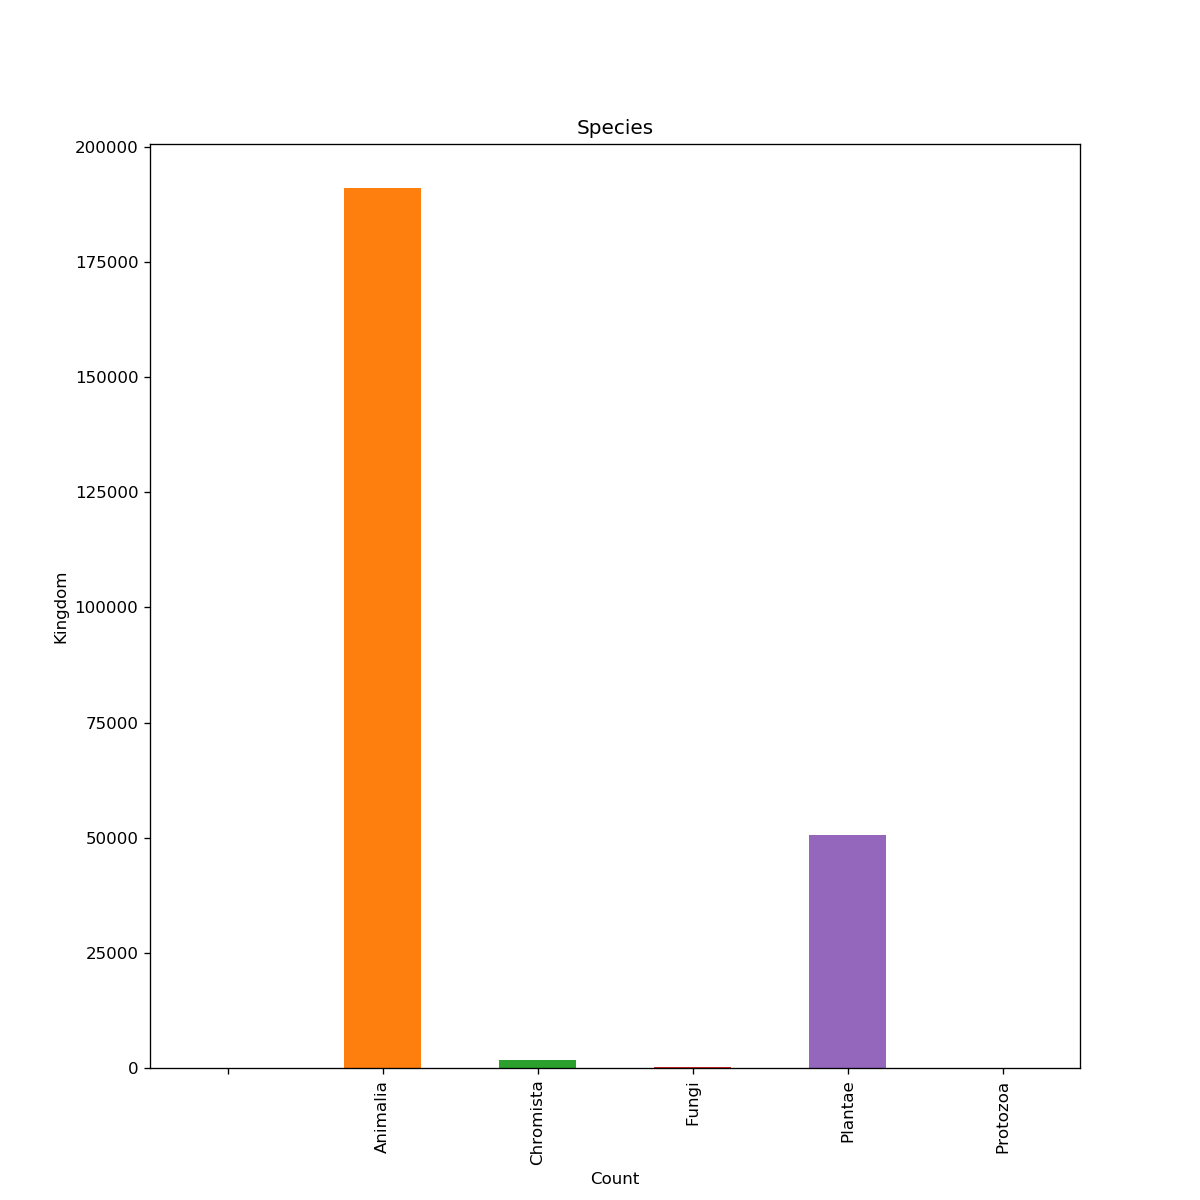

Text(0.5,1,'Species')

In [8]:
import urllib.request
import urllib.parse
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
import uuid
from IPython.display import display_javascript, display_html, display
import json

bird=0
reptile=0
amphibian=0
mammal=0
insect=0
arthropods=0

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

inputvar=input("Type 1 for Great Smokey Mountains, 2 for Yellowstone, 3 for Yosemite, 4 for Zion")
#plt.plot([0, 1, 2, 2]);
#https://bison.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[-84.01390189799997 TO  35.425862222000035] AND decimalLongitude:[ -83.04248553799994 TO  35.84240904300003]&rows=126000&wt=json
grsm1 = 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[35.38%20TO%2035.87]%20AND%20decimalLongitude:[-84.058%20TO%20-82.96]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
grsm2= 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[35.38%20TO%2035.87]%20AND%20decimalLongitude:[-84.058%20TO%20-82.96]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName,hierarchy_homonym_string&fq=basisOfRecord:observation&indent=true&rows=0'

yellowstone1 = 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[44.1325%20TO%2045.1085]%20AND%20decimalLongitude:[-111.1568%20TO%20-109.8242]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
yellowstone2 = 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[44.1325%20TO%2045.1085]%20AND%20decimalLongitude:[-111.1568%20TO%20-109.8242]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName,hierarchy_homonym_string&fq=basisOfRecord:observation&indent=true&rows=0'

yose1 = 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[37.494700257593124%20TO%2038.18514512589431]%20AND%20decimalLongitude:[%20-119.88641742173921%20TO%20-119.19639770576299]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
yose2= 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[37.494700257593124%20TO%2038.18514512589431]%20AND%20decimalLongitude:[%20-119.88641742173921%20TO%20-119.19639770576299]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName,hierarchy_homonym_string&fq=basisOfRecord:observation&indent=true&rows=0'

zion1 = 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[37.14134970000002%20TO%2037.5042845]%20TO%20AND%20TO%20decimalLongitude:[-113.22828553752227%20TO%20-112.8631475]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
zion2= 'https://data.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[37.14134970000002%20TO%2037.5042845]%20TO%20AND%20TO%20decimalLongitude:[-113.22828553752227%20TO%20-112.8631475]&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName,hierarchy_homonym_string&fq=basisOfRecord:observation&indent=true&rows=0'


if (inputvar=='1'):
    f2 = urllib.request.urlopen(grsm2)
elif (inputvar=='2'):
    f2 = urllib.request.urlopen(yellowstone2)
elif (inputvar=='3'):
    f2 = urllib.request.urlopen(yose2)
elif (inputvar=='4'):
    f2 = urllib.request.urlopen(zion2)
jsonResults2=json.loads(f2.read().decode('utf-8'))
facets2=jsonResults2['facet_counts']['facet_pivot']['scientificName,hierarchy_homonym_string']
for index,item in enumerate(facets2):
    try:
        hierarchy=item["pivot"]
        
        print("SciName:", item["value"], "Count:",item["count"])
        for hindex,hitem in enumerate(hierarchy):
            if "-179913-" in hitem["value"]:
                #print("---Hierarchy: Mammal---")
                mammal+=1
            elif "-173747-" in hitem["value"]:
                #print("---Hierarchy: Reptile---")
                reptile+=1
            elif "-173420-" in hitem["value"]:
                #print("---Hierarchy: Amphibian---")
                amphibian+=1
            elif "-174371-" in hitem["value"]:
                #print("---Hierarchy: Bird---")
                bird+=1
            elif "-99208-" in hitem["value"]:
                #print("---Hierarchy: insect---")
                insect+=1
            elif "-82696-" in hitem["value"]:
                #print("---Hierarchy: Arthropods
                Arthropods+=1
               
            """
            if "-202423-" in hitem["value"]:
                #print("---Hierarchy: Mammal---")
                print("---Hierarchy:",hitem["value"])
            elif "-202422-" in hitem["value"]:
                #print("---Hierarchy: Plant---")
                print("---Hierarchy:",hitem["value"])
            elif "-630578-" in hitem["value"]:
                #print("---Hierarchy: Chromista---")
                print("---Hierarchy:",hitem["value"])
            elif "-935939-" in hitem["value"]:
                #print("---Hierarchy: Crenarchaeota---")
                print("---Hierarchy:",hitem["value"])
            elif "-50-" in hitem["value"]:
                #print("---Hierarchy: Bacteria---")
                print("---Hierarchy:",hitem["value"])
            elif "-555705-" in hitem["value"]:
                #print("---Hierarchy: Fungi---")
                print("---Hierarchy:",hitem["value"])
            else:
                print("unknown")
            """
            
            #print("---Hierarchy:",hitem["value"])
    except:
        print("undefined")

#179913 mammalia
#173747 reptilia
#173420 amphibia
#174371 bird
#-202422-954898 plant
#-630578-969910- Chromista
#Crenarchaeota -935939-951422-
#Bacteria -50-956096-956108-
#Fungi -555705-936287-
#facets = list(set(facets))
#print(jsonResults)
#hierarchy_homonym_string

if (inputvar=='1'):
    f = urllib.request.urlopen(grsm1)
elif (inputvar=='2'):
    f = urllib.request.urlopen(yellowstone1)
elif (inputvar=='3'):
    f = urllib.request.urlopen(yose1)
elif (inputvar=='4'):
    f = urllib.request.urlopen(zion1)
jsonResults=json.loads(f.read().decode('utf-8'))

facets=jsonResults['facet_counts']['facet_pivot']['kingdom,scientificName']

#facets=jsonResults['facet_counts']['facet_pivot']['scientificName']
a=0
b=[]
c=[]
print("==================================")
for index,item in enumerate(facets):
    a+=1
    print("Kingdom:", item["value"], "Observation Count:",item["count"])
    print("----")
    if item["value"]!="":
        b.append(item["value"])
        c.append(item["count"])
    else:
        b.append(" ")
        c.append(item["count"])
    
#print(json.dumps(jsonResults, indent=2))
#print(index)
if index==7:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]], index=[b[0],b[1],b[2],b[3],b[4],b[5],b[5],b[7]])
if index==6:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4],c[5],c[6]], index=[b[0],b[1],b[2],b[3],b[4],b[5],b[5]])
if index==5:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4],c[5]], index=[b[0],b[1],b[2],b[3],b[4],b[5]])
if index==4:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4]], index=[b[0],b[1],b[2],b[3],b[4]])
if index==3:
    s = pd.Series([c[0],c[1],c[2],c[3]], index=[b[0],b[1],b[2],b[3]])
if index==2:
    s = pd.Series([c[0],c[1],c[2]], index=[b[0],b[1],b[2]])
if index==1:
    s = pd.Series([c[0],c[1]], index=[b[0],b[1]])
if index==0:
    s = pd.Series([c[0]], index=[b[0]])
print("==================================")
print("Unique Species of Birds:"+str(bird))
print("Unique Species of Reptiles:"+str(reptile))
print("Unique Species of Mammals:"+str(mammal))
print("Unique Species of Amphibians:"+str(amphibian))
print("Unique Species of Insects:"+str(insect))
print("Unique Species of Arthropods:"+str(arthropods))

print("index:")
print(index)
s.plot.bar(figsize=(10,10))
plt.xlabel('Count')
plt.ylabel('Kingdom')
plt.title("Species")